# Cardtonic Twitter Sentiment Analysis

In [1]:
# Import basic libries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import More libries/modules
import re
#from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords   
from datetime import datetime
import glob                     
import os
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anelawrence/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('/home/anelawrence/cardtonic_data/cardtonic_tweets.csv')

In [5]:
df_2 = pd.read_csv('/home/anelawrence/cardtonic_data/cardtonic_tweets_2.csv')

In [6]:
# Combine both DataFrame
tweets_df = pd.concat([df, df_2], ignore_index=True)

In [28]:
len(tweets_df)

22670

In [29]:
tweets_df.head()

,id,url,fullText,createdAt,retweetCount,replyCount,likeCount,quoteCount,viewCount,inReplyToUsername,author/followers,author/following,author/userName
0,1897773467732222000,https://x.com/Frowler_/status/1897773467732222077,@cardtonic Real Sociedad 0-1 Manchester United,2025-03-06 22:17,0,0,0,0,34.0,cardtonic,76,486,Frowler_
1,1897759840388121000,https://x.com/Ese_Obox/status/1897759840388120996,@cardtonic ATM 1-0 Real Madrid,2025-03-06 21:22,0,0,0,0,5.0,cardtonic,74,545,Ese_Obox
2,1897757255799353900,https://x.com/tundabam/status/1897757255799353779,@cardtonic Athletic Madrid 0 vs Real Madrid 1,2025-03-06 21:12,0,0,0,0,7.0,cardtonic,340,4328,tundabam
3,1897724028606943200,https://x.com/Adesewa16169371/status/189772402...,@cardtonic ATM 2-2 Real Madrid,2025-03-06 19:00,0,0,0,0,3.0,cardtonic,126,2004,Adesewa16169371
4,1897717740393165000,https://x.com/spghaddaf/status/189771774039316...,@cardtonic ATM 1-1 R. MADRID,2025-03-06 18:35,0,0,0,0,5.0,cardtonic,618,754,spghaddaf


In [30]:
tweets_df.dtypes

id                     int64
url                   object
fullText              object
createdAt             object
retweetCount           int64
replyCount             int64
likeCount              int64
quoteCount             int64
viewCount            float64
inReplyToUsername     object
author/followers       int64
author/following       int64
author/userName       object
dtype: object

## Data Cleaning

In [31]:
tweets_df["createdAt"] = pd.to_datetime(tweets_df["createdAt"])

# #set index = date so as to create rolling mean 
# tweets_df = tweets_df.sort_values("date").set_index("date")

In [32]:
tweets_df.dtypes

id                            int64
url                          object
fullText                     object
createdAt            datetime64[ns]
retweetCount                  int64
replyCount                    int64
likeCount                     int64
quoteCount                    int64
viewCount                   float64
inReplyToUsername            object
author/followers              int64
author/following              int64
author/userName              object
dtype: object

In [33]:
# check for duplicate tweets
tweets_df['fullText'].duplicated().sum()

np.int64(7895)

In [34]:
# Drop duplicate tweets
tweets_df.drop_duplicates(subset=['fullText'], inplace=True)
tweets_df['fullText'].duplicated().sum()

np.int64(0)

In [35]:
tweets_df.shape

(14775, 13)

In [36]:
# rename fullText to tweet
tweets_df.rename(columns = {'fullText':'tweet'}, inplace = True)

In [37]:
# rename createdAt to date
tweets_df.rename(columns = {'createdAt':'date'}, inplace = True)

In [38]:
tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'viewCount', 'inReplyToUsername', 'author/followers',
       'author/following', 'author/userName'],
      dtype='object')

In [39]:
tweets_cardtonic = tweets_df[tweets_df['author/userName'] == 'cardtonic']

In [40]:
tweets_cardtonic.tail()

,id,url,tweet,date,retweetCount,replyCount,likeCount,quoteCount,viewCount,inReplyToUsername,author/followers,author/following,author/userName
22665,1214641421665407000,https://x.com/cardtonic/status/121464142166540...,Rush over to our platform to sell your steam w...,2020-01-07 20:14:00,0,0,0,0,NaN,NaN,15756,48,cardtonic
22666,1213959220871213000,https://x.com/cardtonic/status/121395922087121...,Happy new week!\n\nDon’t forget to trade with ...,2020-01-05 23:03:00,0,0,0,0,NaN,NaN,15756,48,cardtonic
22667,1213363078500438000,https://x.com/cardtonic/status/121336307850043...,"@kakra68 Wrong. If you do not help yourself, h...",2020-01-04 07:34:00,0,0,0,0,NaN,kakra68,15756,48,cardtonic
22668,1213044799609200600,https://x.com/cardtonic/status/121304479960920...,Trade your BITCOINS and unused GIFT CARDS (iTu...,2020-01-03 10:29:00,0,0,0,0,NaN,NaN,15756,48,cardtonic
22669,1212772929022431200,https://x.com/cardtonic/status/121277292902243...,Happy New Year to EVERYONE!\n\nThank you guys ...,2020-01-02 16:29:00,0,0,0,0,NaN,NaN,15756,48,cardtonic


In [41]:
tweets_df = tweets_df[tweets_df['author/userName'] != 'cardtonic']

In [42]:
tweets_df.shape

(11912, 13)

In [43]:
tweets_df.to_csv('clean_tweets.csv', index=False)

In [44]:
tweets_df = pd.read_csv('clean_tweets.csv')

In [45]:
tweets_df.tweet.head()

0    @cardtonic Real Sociedad 0-1 Manchester United
1                    @cardtonic ATM 1-0 Real Madrid
2     @cardtonic Athletic Madrid 0 vs Real Madrid 1
3                    @cardtonic ATM 2-2 Real Madrid
4                      @cardtonic ATM 1-1 R. MADRID
Name: tweet, dtype: object

In [46]:
# Removing Some football Prediction tweets
# List of keywords to filter out
keywords = ['Real Madrid', 'ATM', 'Manchester United', 'Manchester city', 'Man city', 'Arsenal', 'Tottenham']

# Create a regex pattern that matches any of the keywords (case insensitive)
pattern = '|'.join(keywords)  #'Real Madrid | ATM | Manchester United'

tweets_df = tweets_df[~tweets_df['tweet'].str.contains(pattern, case=False, na=False)].reset_index(drop=True)

In [47]:
tweets_df.tweet.head()

0    @symplyDAPO @cardtonic Let your face shine upo...
1    @Mc_Phils @symplyDAPO @cardtonic Na me be numb...
2             @Mc_Phils @symplyDAPO @cardtonic Leggooo
3                      @symplyDAPO @cardtonic Leggoooo
4       @Mc_Phils @symplyDAPO @cardtonic Pick me as #1
Name: tweet, dtype: object

In [ ]:
tweets_df["date"] = pd.to_datetime(tweets_df["date"])
tweets_df.dtypes

In [49]:
# function to clean tweet column
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    pat7 = r'\n'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6, pat7))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [50]:
tweets_df["tweet"] = tweets_df["tweet"].apply(clean_text)

In [52]:
tweets_df["tweet"].head()

0    let your face shine upon me
1                na me be number
2                        leggooo
3                       leggoooo
4                     pick me as
Name: tweet, dtype: object

## Data Preprocessing

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model for a three-class sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define labels corresponding to the model's output indices
labels = ["negative", "neutral", "positive"]

# Sentiment Analysis function
def predict_sentiment(tweet):
    # Encode the text
    inputs = tokenizer(tweet, return_tensors="pt")
    outputs = model(**inputs)
    # Convert logits to probabilities
    scores = outputs.logits.detach().numpy()[0]
    scores = np.exp(scores) / np.sum(np.exp(scores))
    max_index = scores.argmax()
    return pd.Series([labels[max_index], scores[max_index]])


In [47]:
# Apply the prediction function to the DataFrame
tweets_df[['sentiment', 'confidence']] = tweets_df['tweet'].apply(predict_sentiment)

In [51]:
tweets_df[['sentiment', 'confidence','tweet']].head()

,sentiment,confidence,tweet
0,positive,0.793051,let your face shine upon me
1,neutral,0.648401,na me be number
2,neutral,0.480208,leggooo
3,neutral,0.459649,leggoooo
4,neutral,0.720524,pick me as


In [60]:
# Drop columns 'Subjectivity', 'Polarity' and 'Sentiment'
tweets_df.drop(['Subjectivity', 'Polarity',
       'Sentiment'], axis=1, inplace=True)

tweets_df.columns

Index(['id', 'url', 'tweet', 'date', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'viewCount', 'inReplyToUsername', 'author/followers',
       'author/following', 'author/userName', 'cleaned_words', 'month_year',
       'sentiment', 'confidence'],
      dtype='object')

In [7]:
# print("Running sentiment process")

# # creating two new columns(polarity and subjectivity)
# def getSubjectivity(text):
#     return TextBlob(text).sentiment.subjectivity
# def getPolarity(text):
#     return TextBlob(text).sentiment.polarity

# tweets_df["Subjectivity"] = tweets_df['tweet'].apply(getSubjectivity)
# tweets_df["Polarity"] = tweets_df['tweet'].apply(getPolarity)

In [63]:
#creating a polarity column to show if the tweet is positive, negative or neutral (1,-1,0)
def analysis(score):
    if score == "negative":
        return -1
    elif score == "neutral":
        return 0
    else:
        return 1

tweets_df['polarity'] = tweets_df['sentiment'].apply(analysis)

In [66]:
tweets_df.to_csv('analyzed_tweets.csv', index=False)

In [68]:
tweets_df[['date', 'sentiment', 'confidence', 'polarity','tweet']].head()

,date,sentiment,confidence,polarity,tweet
0,2025-03-06 17:42:00,positive,0.793051,1,let your face shine upon me
1,2025-03-06 17:19:00,neutral,0.648401,0,na me be number
2,2025-03-06 17:12:00,neutral,0.480208,0,leggooo
3,2025-03-06 17:12:00,neutral,0.459649,0,leggoooo
4,2025-03-06 17:11:00,neutral,0.720524,0,pick me as


## Data Visualization and Exploratory

In [3]:
tweets_df = pd.read_csv('/home/anelawrence/cardtonic_data/analyzed_tweets.csv')

In [4]:
total_tweets = tweets_df.shape[0]
total_tweets

10963

In [5]:
user_count = tweets_df['author/userName'].nunique()
user_count

5042

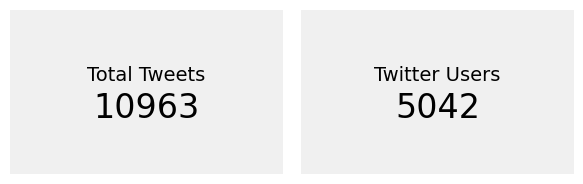

In [17]:
# Apply a Seaborn theme for consistent styling
sns.set_theme(style="white")

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 2))  # adjust figsize as needed

for ax in axes:
    ax.axis('off')  # hide the axes for a clean card look
    # Add a background rectangle to simulate the card
    card_bg = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, color="#f0f0f0")
    ax.add_patch(card_bg)

# First card
axes[0].text(0.5, 0.6, "Total Tweets", fontsize=14, ha="center", va="center", color="black")
axes[0].text(0.5, 0.4, f"{total_tweets}", fontsize=24, ha="center", va="center", color="black")

# Second card
axes[1].text(0.5, 0.6, "Twitter Users", fontsize=14, ha="center", va="center", color="black")
axes[1].text(0.5, 0.4, f"{user_count}", fontsize=24, ha="center", va="center", color="black")

# Save the figure as an image file (download it)
plt.savefig("tweet_card_visual.png", dpi=300)

plt.tight_layout()
plt.show()


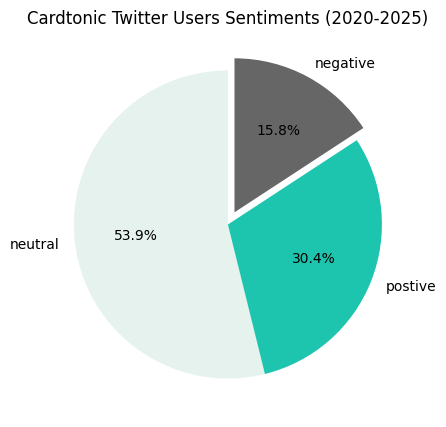

In [71]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[7,5], facecolor='none')
plt.pie(tweets_df['sentiment'].value_counts(), labels=['neutral','postive', "negative"], colors=['#E6f2ee', '#1dc5af', '#666666'], startangle=90, explode= [0,0,0.09], autopct='%1.1f%%');
plt.title('Cardtonic Twitter Users Sentiments (2020-2025)');

**Observation**: Between 2020 and 2025, 53.9% of tweets about Cardtonic are neutral, 30.4% are positive, and 15.8% are negative.

### Creating word cloud

In [17]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['u', 'na', 'know', 'one', 'go', 'make', 'see', 'dont', 'amp', 'im', 'cant']
tweets_df['cleaned_words'] = tweets_df['tweet'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

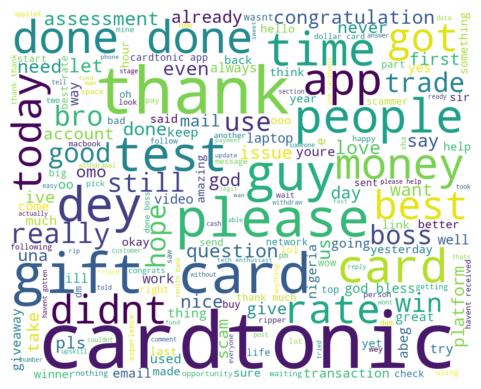

In [25]:
#Creating the text variable
text = " ".join(i for i in tweets_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

**Observation**: The word cloud reveals the most frequent words in the tweets. "Cardtonic" is the subject matter, accompanied by other positive/neutral words such as thank, "gift card," money, people etc.

### Create Average Monthly Sentiment Analysis

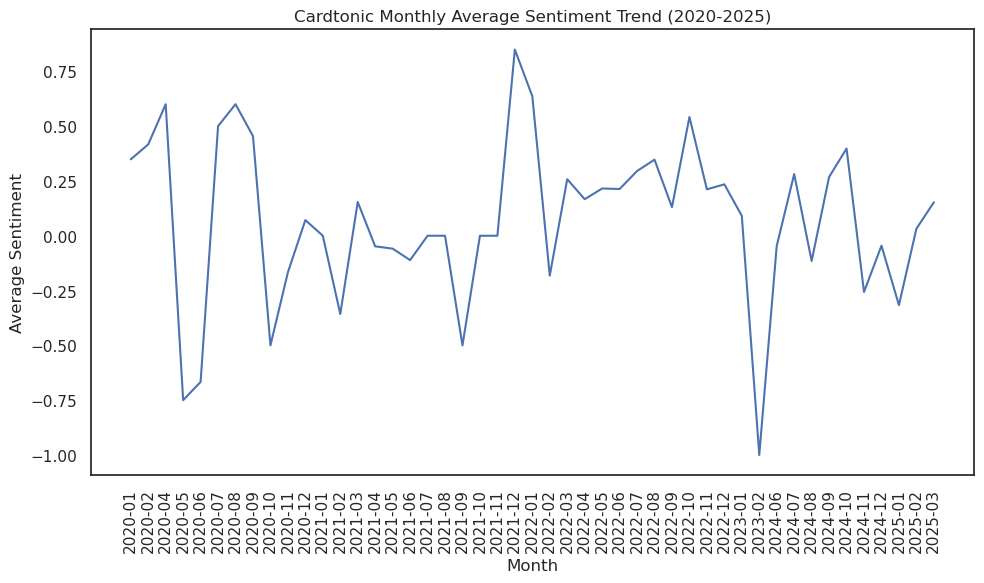

In [23]:
# Extract month-year and group by it

tweets_df["date"] = pd.to_datetime(tweets_df["date"])

# This creates a new column in 'YYYY-MM' format
tweets_df['month_year'] = tweets_df['date'].dt.to_period('M').astype(str)
# Group by month and compute the average sentiment for each month
monthly_sentiment = tweets_df.groupby('month_year')['polarity'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly trend using Seaborn
sns.lineplot(data=monthly_sentiment, x='month_year', y='polarity', ax=ax)
plt.title('Cardtonic Monthly Average Sentiment Trend (2020-2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()      # Adjust layout if necessary
plt.show()

**Observation**: The chart displays monthly average sentiment trend since 2020-2025. The sentiment polarity ranges from -1 to 1 (where Negative=-1, Neutral=0 and Positive=1). December 2021 reached the highest positive sentiment, while February 2023 registered the most negative sentiment. Recent tweets show a moderate overall polarity.

/tmp/ipykernel_265400/297608870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")


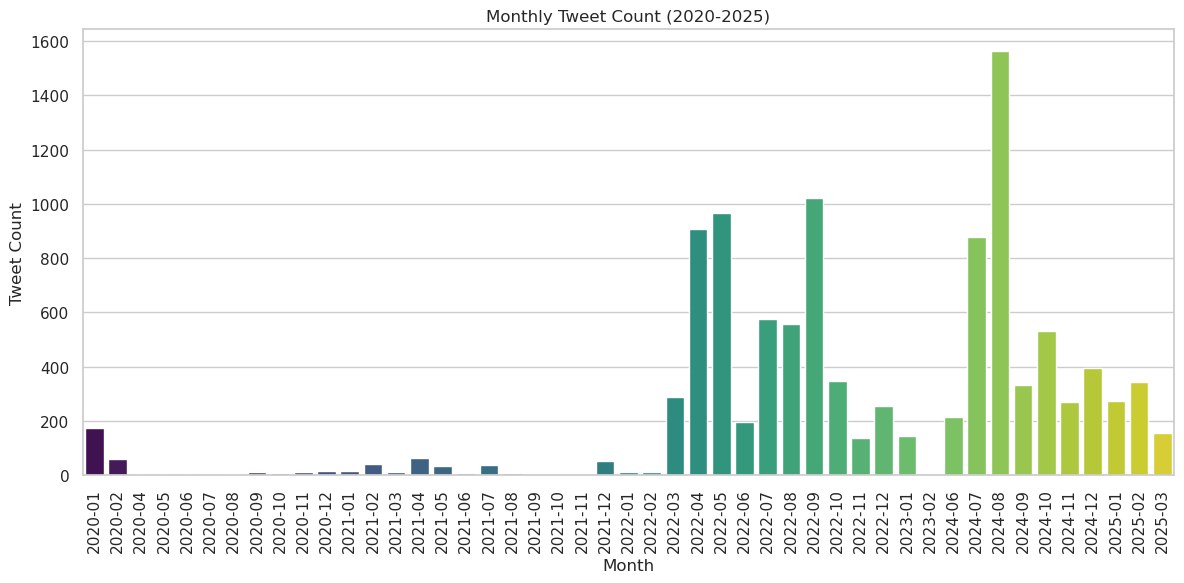

In [28]:
# Group by month using the dt.to_period accessor and count tweets
monthly_counts = tweets_df.groupby(tweets_df['date'].dt.to_period('M')).size().reset_index(name='count')

# Set up the seaborn style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Create the barplot
sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.title("Monthly Tweet Count (2020-2025)")

plt.tight_layout()

# Save the image
plt.savefig("monthly_tweet_count.png", dpi=300)

plt.show()

In [9]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_colwidth', None)

In [11]:
tweets_df[tweets_df['month_year'] == '2023-02'][['tweet', 'sentiment', 'confidence', 'polarity']]

,tweet,sentiment,confidence,polarity
4966,what about the killing in delta state sapele everyday by day,negative,0.849909,-1
4967,i trade card with cardtonic yesterday but the money they sent never enter now telling i should wait till hours will the person that gives me work will understand this since yesterday now tell me to contact my bank are they not the one that s,negative,0.537589,-1


### The top issues customers face (e.g., transaction failures, limits, blocked cards)

In [26]:
negative_df = tweets_df[tweets_df['sentiment'] == 'negative']

In [27]:
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

negative_df[['sentiment','confidence','tweet']].head()

,sentiment,confidence,tweet
41,negative,0.492145,it is better you reply my dm before i send proof to verydarkman and get justice and nigeria will stop trading with you
42,negative,0.934781,you guys ripped me
44,negative,0.526989,there rates are way better than infact i had to deactivate and delete the chipper app greedy bastards
47,negative,0.536261,you guys should work on your app ona dey take forever to pay and e no sharp
49,negative,0.897855,theyre very slow in trading and payments


In [37]:
negative_df.shape

(1730, 18)

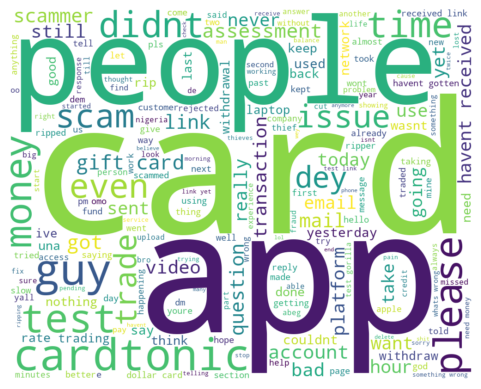

In [29]:
#Creating the text variable
text = " ".join(i for i in negative_df.cleaned_words.astype(str))

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

**Observation**: A significant number of negative tweets highlight issues with the app, card, account, and timing. This suggests that the app needs a thorough evaluation and subsequent updates to enhance the user experience. Also, the sales and customer service teams must respond promptly to customer concerns. Negative remarks featuring words such as "scam," "scammer," or "bad" should be addressed immediately to restore customer confidence in Cardtonic.

In [36]:
# List of keywords to filter out
keywords = ['app', 'card', 'issue', 'time', 'scam', 'scammer', 'people', 'bad', 'test', 'cardtonic', 'gift card', 'trade']

# Create a regex pattern that matches any of the keywords (case insensitive)
pattern = '|'.join(keywords)

tweets = negative_df[negative_df['tweet'].str.contains(pattern, case=False, na=False)]
tweets[['sentiment','confidence','tweet', 'author/userName']].tail(10)

,sentiment,confidence,tweet,author/userName
10729,negative,0.540296,no more excuses about falling for a scammer when redeeming your gift carduse cardtonic today for all your online transactions,UnclePamilerin
10759,negative,0.580731,ive never experienced it but i can imagine that it was not a good experienceto prevent it from happening again please exchange your gift cards amp bitcoins with cardtonicit fully registered with nigeria cac amp offers the best rates app available for android ios,Alex_Houseof308
10766,negative,0.733382,you dont want this to be your valentine experiencesharply trade buy and sell your bitcoins redeem gift cards and your other digital valuables with make dem hold your shirt like thief,maziibe_
10774,negative,0.703444,you have at your finger tips you are still selling to scammers get to them today,Eminitybaba_
10805,negative,0.920045,why are you all misinformed different adverts same mistake you can only sell bitcoins on cardtonic you cant buy,stiffy96
10833,negative,0.504143,seiten can disappoint you but cardtonic would never tryna buy and sell bitcoins redeem gift cards this app is all you need so get downloading,TheDilichi
10848,negative,0.491300,forget about the about cardtonic listen to this guy,sisiwale
10866,negative,0.558545,una don hear now o no allow dem scam you o,oluwaluhmie
10880,negative,0.558245,okay i got a reply saying my card was rejected and the reasons stated i hope this wont affect my trading next time,babak25098
10939,negative,0.646719,being having issues opening,IsraelAtanda1


In [35]:
#negative_df.to_csv('negative_tweets.csv', index=False)

### Cardtonic common positive themes

In [30]:
positive_df = tweets_df[tweets_df['sentiment'] == 'positive']

In [31]:
positive_df[['sentiment','confidence','tweet']].head()

,sentiment,confidence,tweet
0,positive,0.793052,let your face shine upon me
5,positive,0.952267,god bless you abundantly sir
7,positive,0.970248,cardtonic is great
8,positive,0.872880,stay blessed
9,positive,0.817794,wowamazing


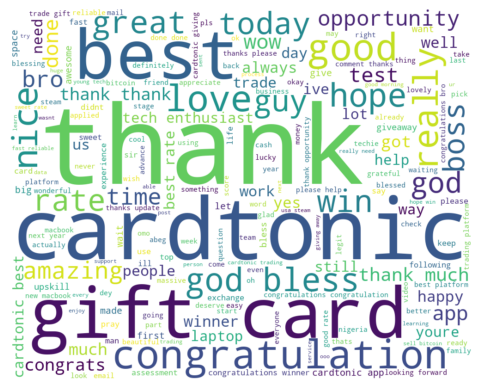

In [32]:
#Creating the text variable
text = " ".join(i for i in positive_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

**Observation:** Most of positive tweets made reference to the Appreciative words like thank, best, congratulations. This might be influenced by Customer reward programs,  excellent customer service, promotional giveaway, etc  

In [33]:
# List of keywords to filter out
keywords = ['best', 'congratulation', 'nice', 'love', 'hope', 'amazing test', 'best rate', 'god', 'wow', 'cardtonic', 'gift card', 'good', 'really']

# Create a regex pattern that matches any of the keywords (case insensitive)
pattern = '|'.join(keywords)

tweets = positive_df[positive_df['tweet'].str.contains(pattern, case=False, na=False)]
tweets[['sentiment','confidence','tweet', 'author/userName']].head(20)

,sentiment,confidence,tweet,author/userName
5,positive,0.952267,god bless you abundantly sir,the_ayodamola
7,positive,0.970248,cardtonic is great,esepalmerr
9,positive,0.817794,wowamazing,bello_adefunke
10,positive,0.990503,i just love the way you care about othersthis is a special gift from godyou are forever blessed,Kklazzique
11,positive,0.953339,god bless your kind heart for thisi pray am among lucky person also,Annie_john18
16,positive,0.638720,nice,JoshuaM39947852
17,positive,0.970349,congratulations and more wins boss,wole_id91
18,positive,0.854656,nice one,Akinjoshua2017
19,positive,0.862598,that nice,RuthIyanu96616
27,positive,0.968690,the rate is very good,Hybrid_Ola


In [26]:
positive_df.shape

(3328, 18)

In [28]:
positive_df.to_csv('positive_tweets.csv', index=False)